In [452]:
def global_step(x, obj_func, bounds):
    c = 1.0
    y = np.empty((len(x)))
    for i in range(len(x)): 
        y[i] = schwefel(x[i])
    y  = y -  np.min(y)
    y =  y/np.max(y)
    cov = np.cov(x.T,aweights = 1.0 - (y**c))
    mean= np.mean(x , axis = 0)

    offspring = np.random.multivariate_normal(mean, cov, size = len(x))
    #mean = mean * np.random.uniform(low = 0.9, high = 1.1)
    #for i in range(len(offspring)):
    #    for j in range(len(offspring[0])):
    #        offspring[i,j] = min(max(bounds[j,0], offspring[i,j]),bounds[j,1])
    return offspring

In [453]:
def schwefel(x,args = None):
    return 418.9829*len(x) - np.sum(x*np.sin(np.sqrt(np.abs(x)))) + 4.0*x[0]

In [454]:
def plot_schwefel(bounds = [[-500,500],[-500,500]], resolution = 100, points = None, deflation_points = None):
    X = np.linspace(bounds[0][0], bounds[0][1], resolution)
    Y = np.linspace(bounds[1][0], bounds[1][1], resolution)
    X, Y = np.meshgrid(X, Y)
    s = np.empty((X.shape))

    for i in range(len(X)):
        for j in range(len(Y)):
            s[i,j] = schwefel(np.array([X[i,j],Y[i,j]]))
                
    fig = plt.figure(0)
    a = plt.pcolormesh(X, Y, s, cmap=cm.viridis)
    plt.scatter(x[:,0],x[:,1])
    mean= np.mean(x , axis = 0)
    plt.scatter(mean[0],mean[1])
    plt.colorbar(a)
    plt.show()

In [455]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
x = np.random.uniform(low = -500 , high = 500,size = (50,2))

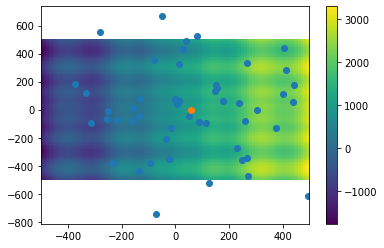

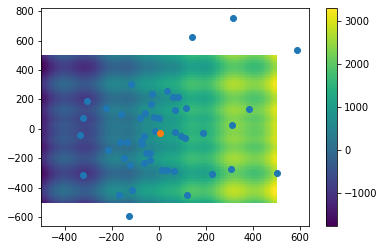

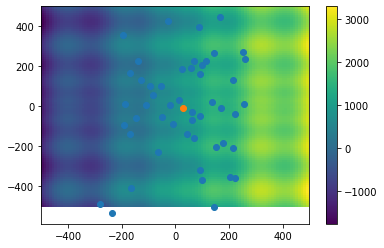

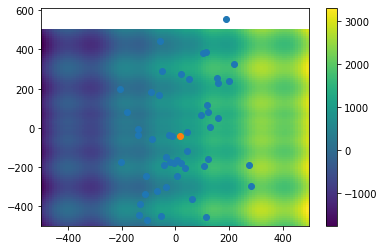

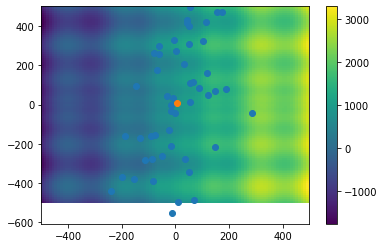

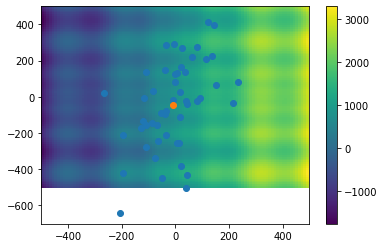

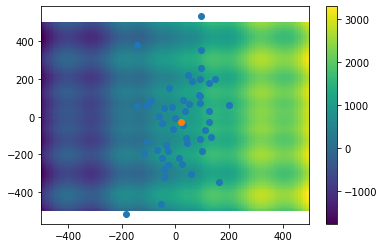

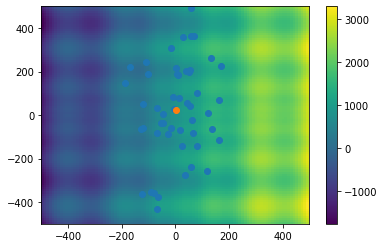

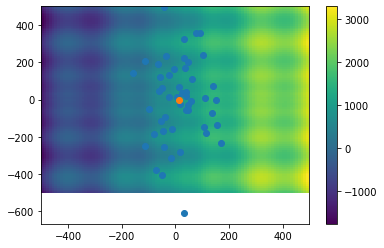

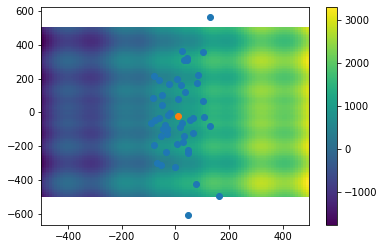

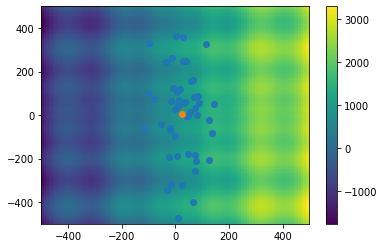

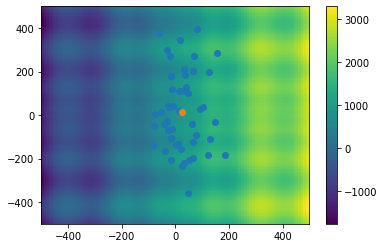

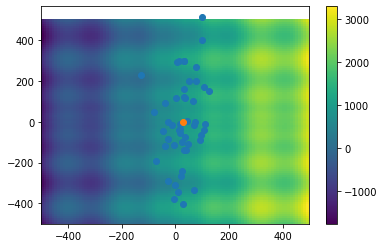

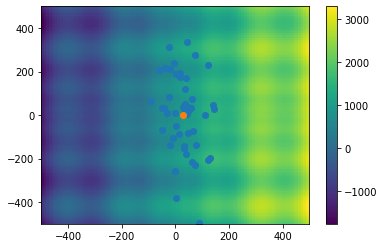

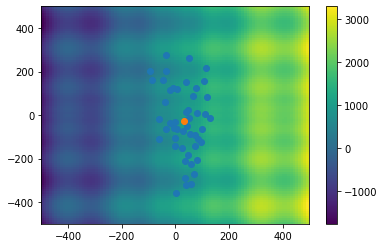

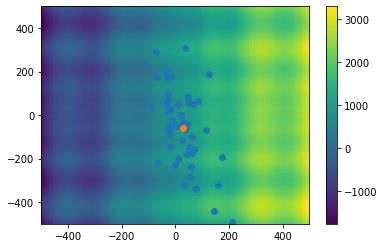

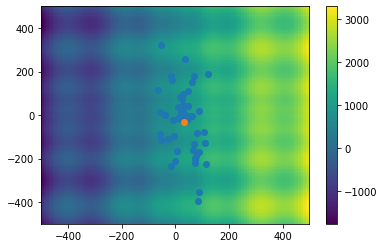

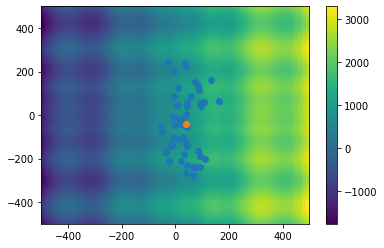

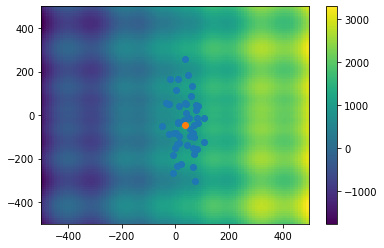

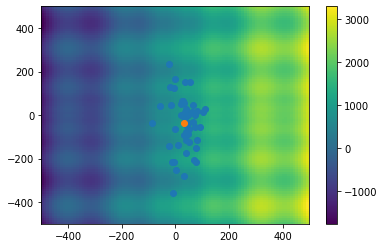

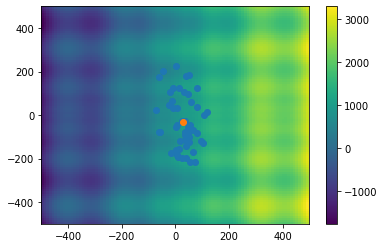

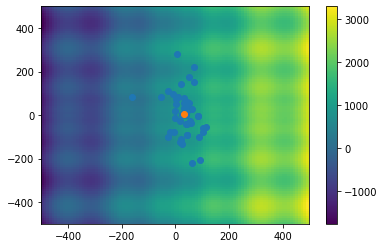

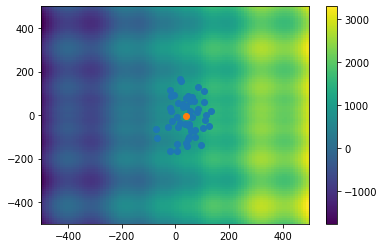

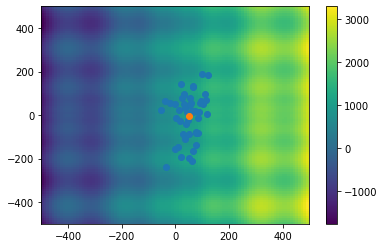

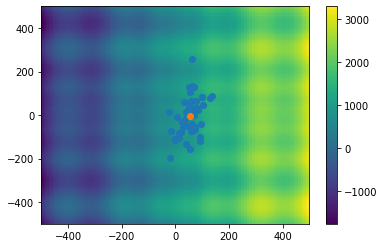

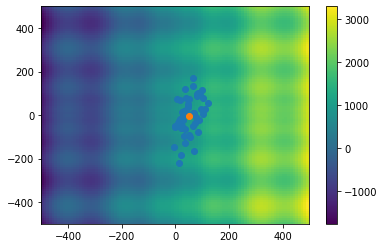

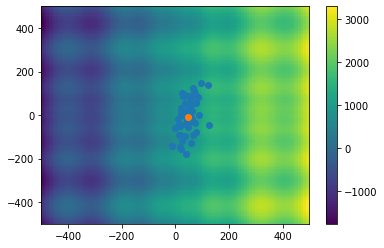

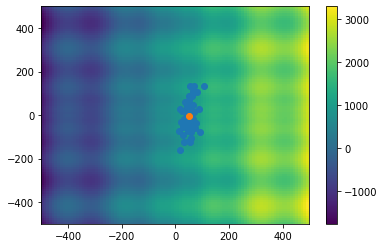

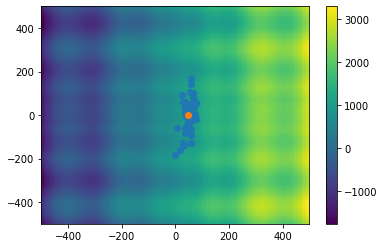

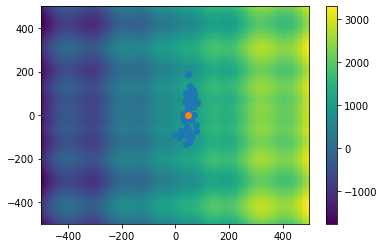

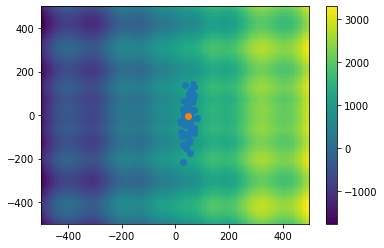

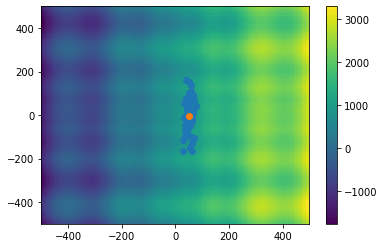

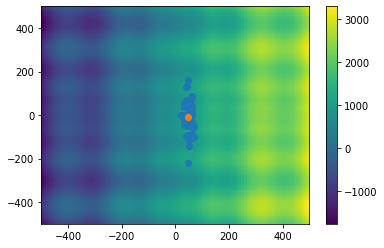

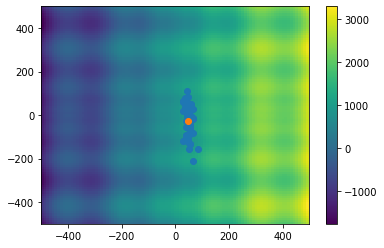

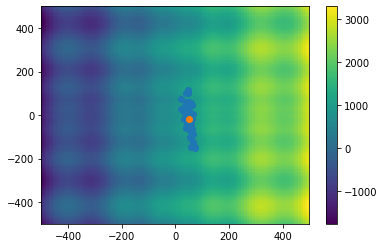

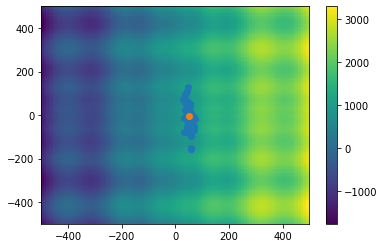

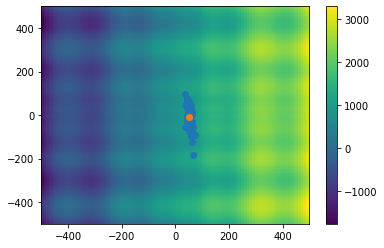

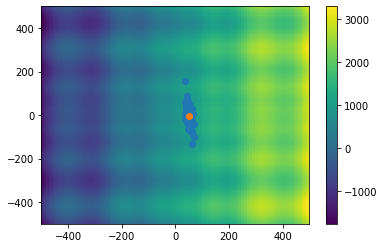

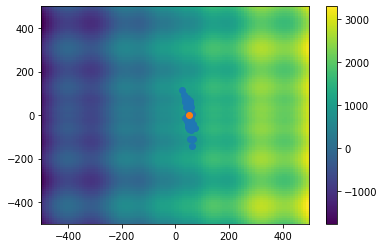

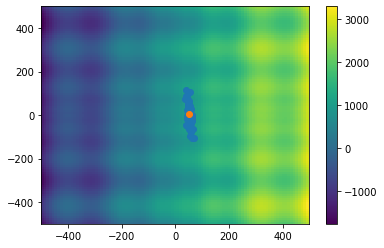

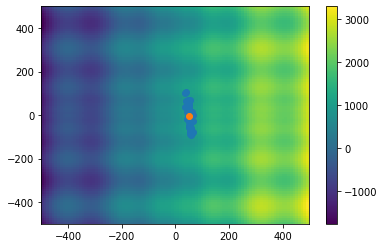

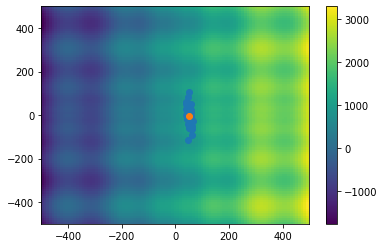

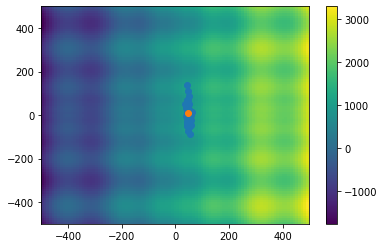

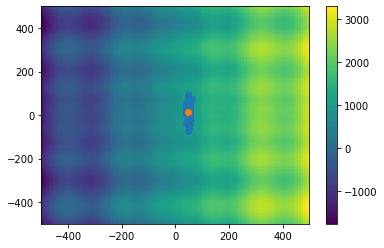

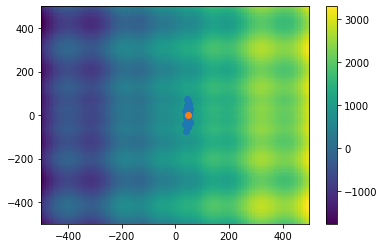

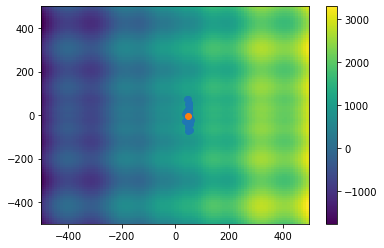

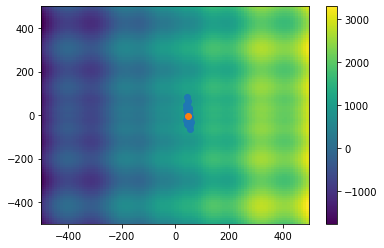

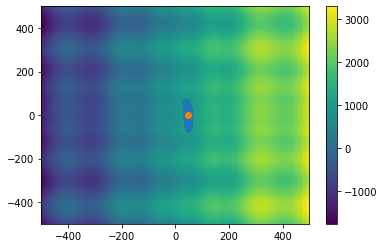

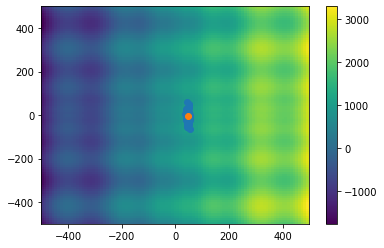

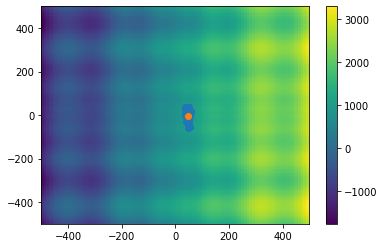

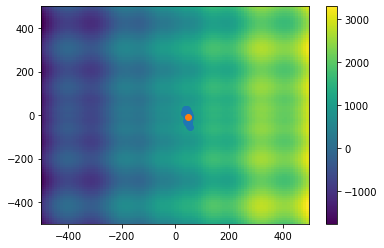

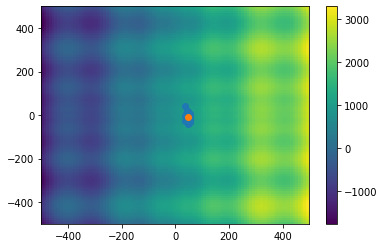

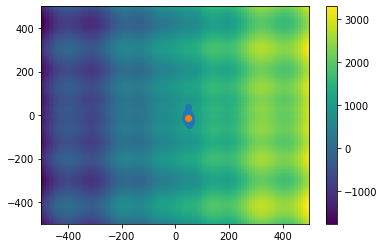

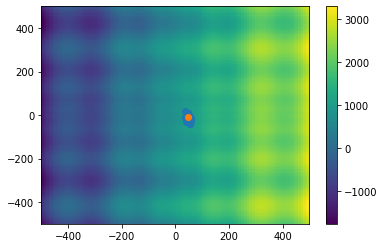

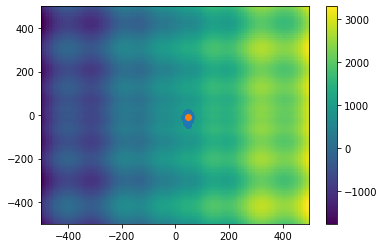

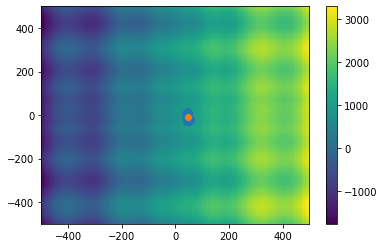

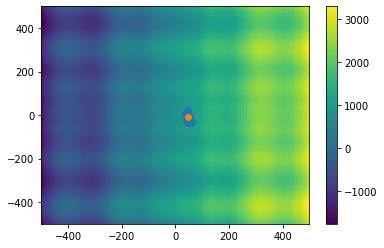

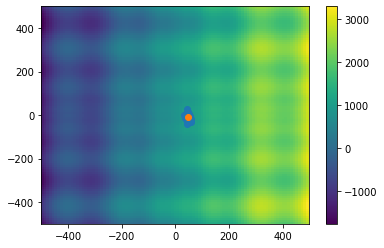

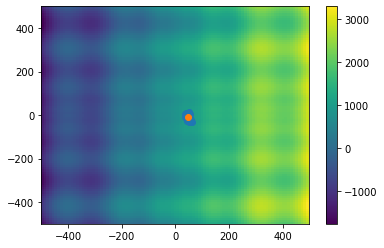

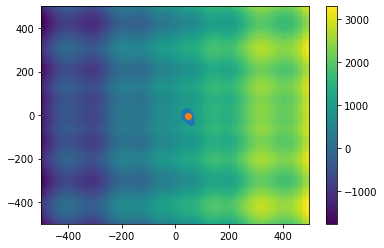

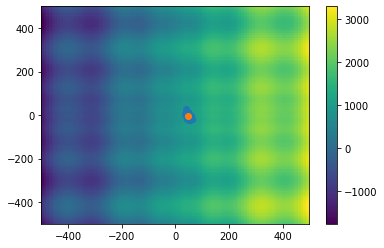

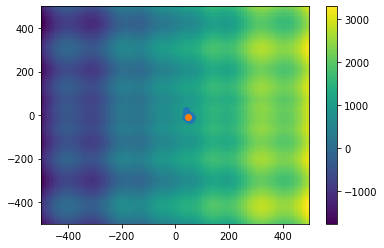

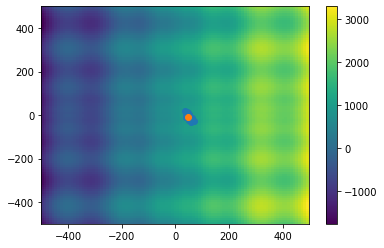

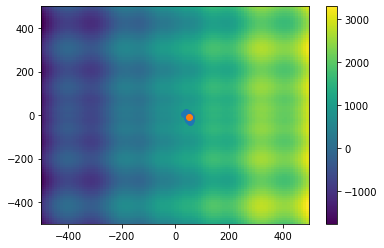

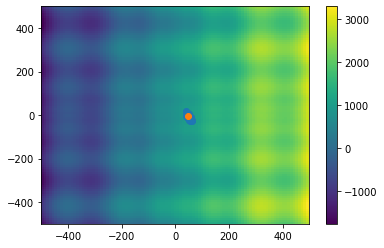

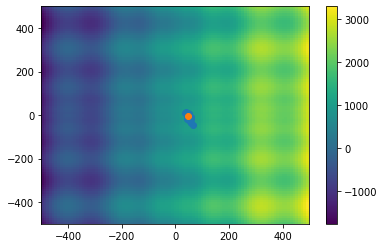

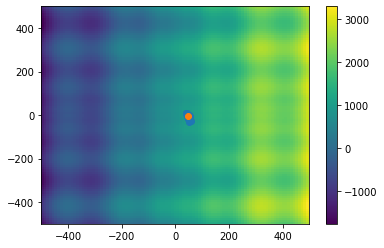

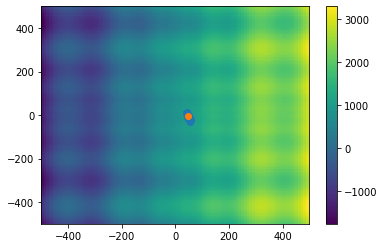

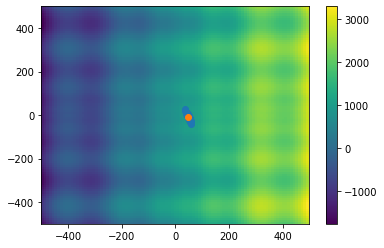

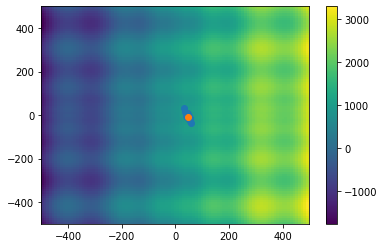

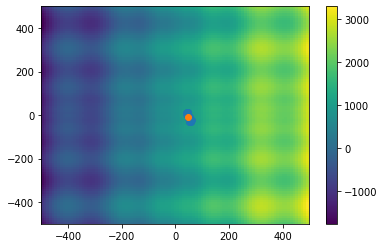

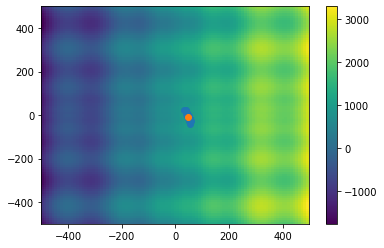

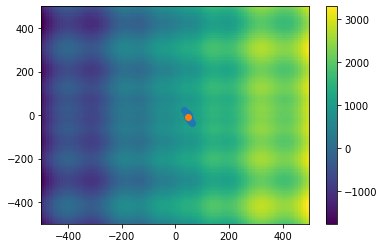

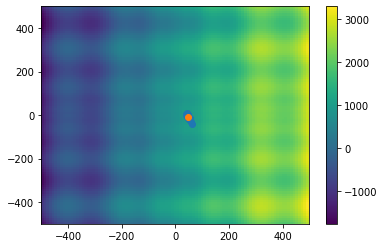

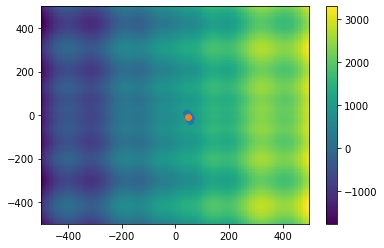

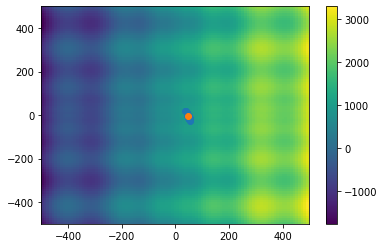

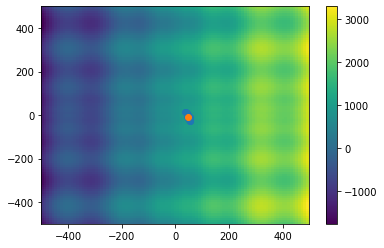

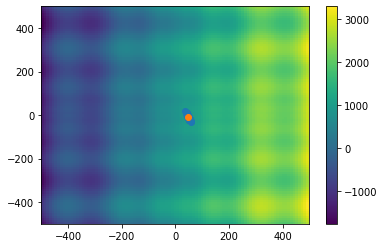

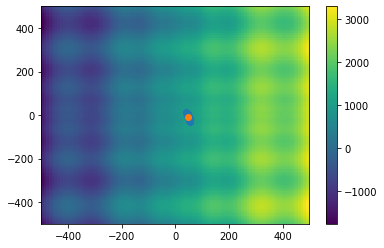

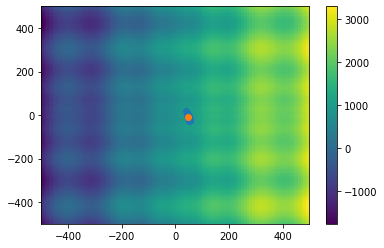

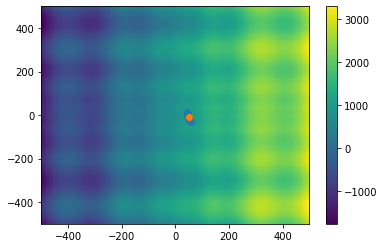

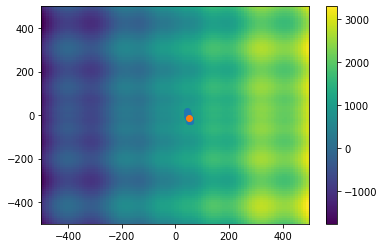

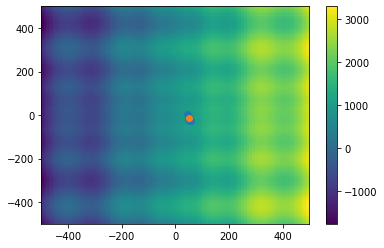

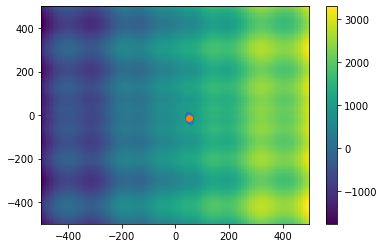

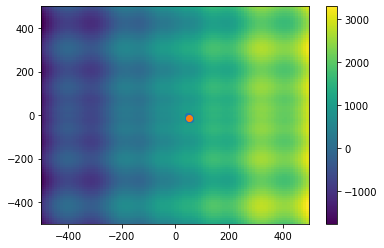

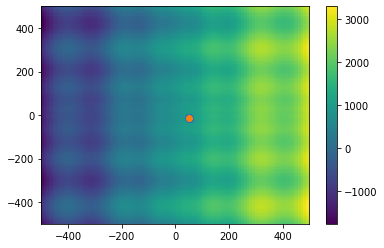

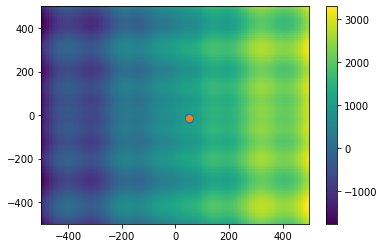

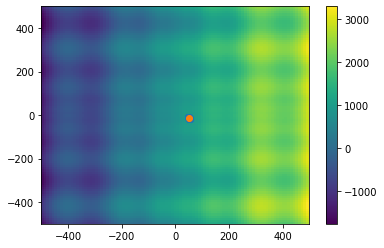

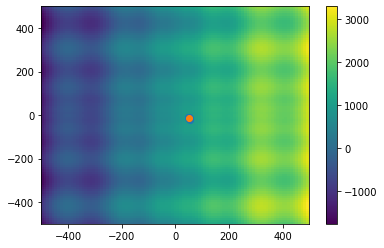

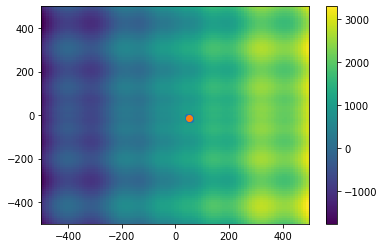

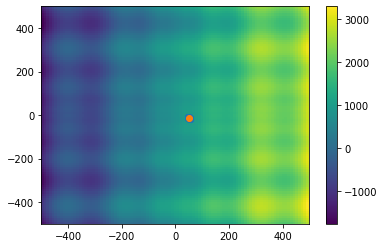

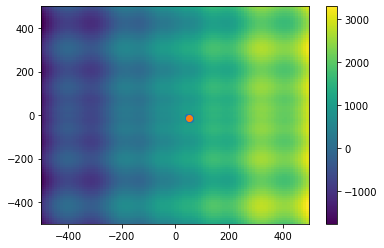

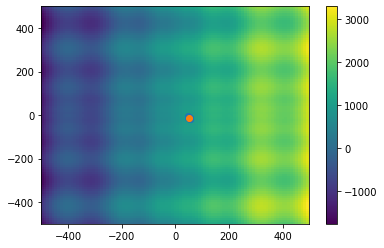

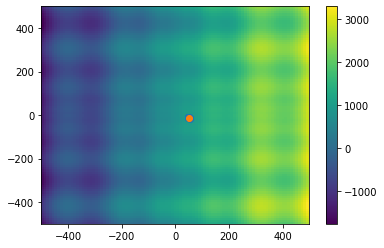

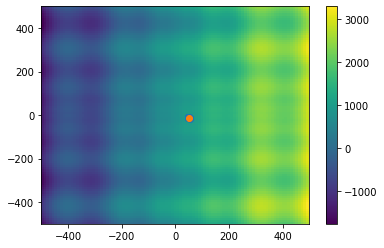

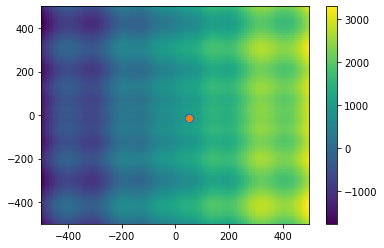

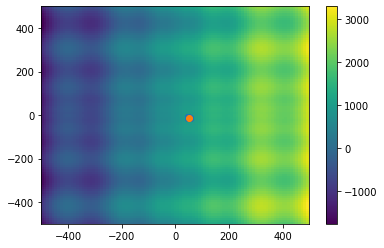

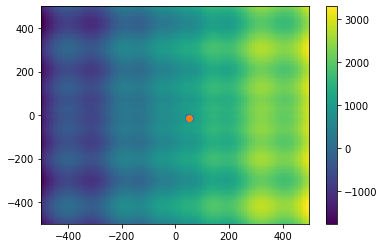

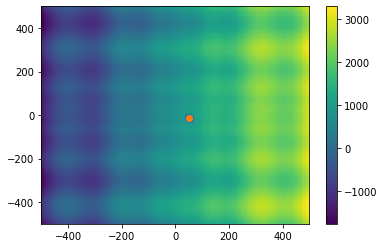

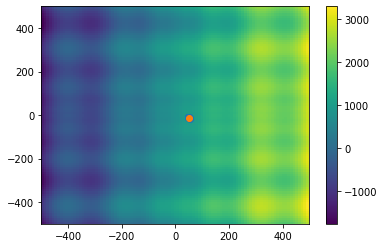

In [456]:
bounds = np.array([[-500,500],[-500,500]])
for i in range(100):
    x = global_step(x,schwefel, bounds)
    plot_schwefel(points = x)